In [1]:
import ROOT
import math

Welcome to JupyROOT 6.18/04


Вариант 5 - метод композиций и реджекций

In [2]:
c = ROOT.TCanvas("c", "result")

In [3]:
a = -3
b = 3

nh = 100
dh = (b - a)/nh

In [4]:
def Fn(xx, pp):
    x = xx[0]
    norm = pp[0]
    return norm*((math.sin(x))**6 + (1 + x)**4)

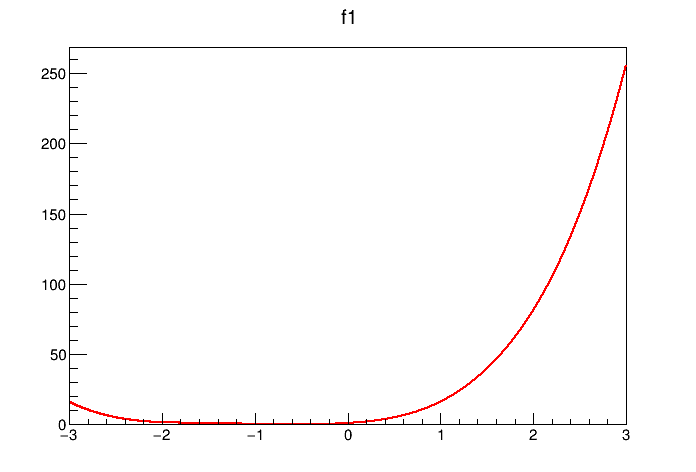

In [29]:
f1 = ROOT.TF1('f1', Fn, a, b, 1)

f1.SetParameter(0,1)
f1.SetNpx(10000)
f1.Draw()
c.Draw()

Neuman Method

In [6]:
M = f1(b)

def doNeumanMethod(a, b):
    while True:
        r = ROOT.gRandom.Uniform(a, b)  #равномерно на [a,b]
        mu = ROOT.gRandom.Uniform(0.0, M)
        
        if mu <= f1(r):
            return r

In [7]:
sw = ROOT.TStopwatch() #to count a clock

In [8]:
hNeuman = ROOT.TH1F('hNeuman', 'Neuman Method', 100, a, b)  #гистограмма

In [9]:
sw.Start()

for i in range(0, 10000):
    value = doNeumanMethod(a, b)
    hNeuman.Fill(value)
    
sw.Stop()

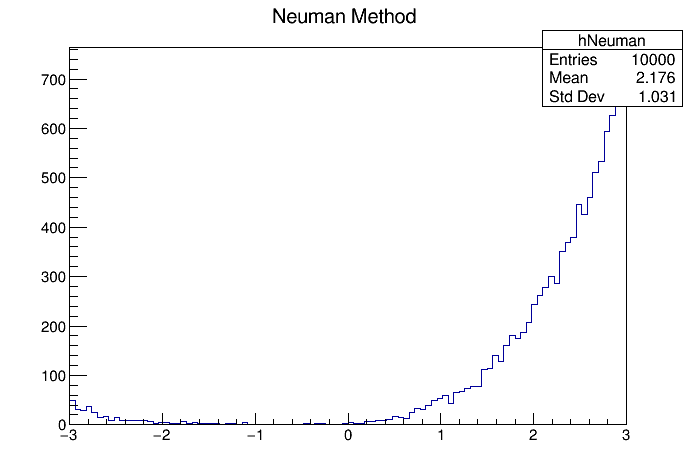

In [10]:
hNeuman.Draw()
c.Draw()

In [11]:
sw.Print()  #интервал времени

Real time 0:00:01, CP time 1.570


In [38]:
fit1 = hNeuman.Fit(f1)

 FCN=81.1115 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=1.44709e-19    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.79476e+00   2.80617e-02   1.24161e-04  -1.91712e-08


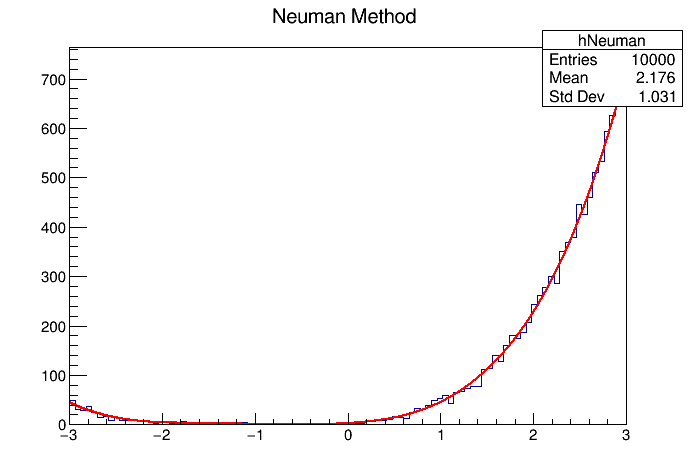

In [39]:
hNeuman.Draw()
c.Draw()

In [14]:
print('Среднее =', hNeuman.GetMean())

Среднее = 2.175579283578135


In [15]:
print('Стандартная ошибка =', hNeuman.GetRMS())

Стандартная ошибка = 1.0313046654501994


Метод композиций и реджекций

Методом неймана - (sin(x))^6 - т.к. периодичный и ограничен [0, 1]      
Методом прямой выборки - полином (1 + x)^4 

In [50]:
def Ff1(x, p):
    return p[0]*(math.sin(x[0]))**6

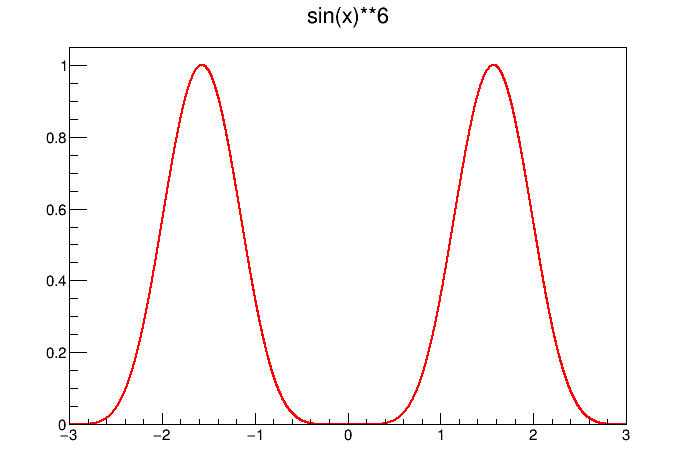

In [51]:
f3 = ROOT.TF1('sin(x)**6', Ff1, a, b, 1)

f3.SetParameter(0,1)
f3.SetNpx(10000)
f3.Draw()
c.Draw()

In [17]:
def abs_and_pow(x, n):  #нужен, чтобы избежать случая х < 0 - корень комплексное число
    if x >= 0:
        return pow(x, n)
    else:
        return -pow(-x, n)

In [18]:
c0 = (a + 1)**5
d = (b + 1)**5 - (a + 1)**5

def F2(x): #интегрированная функция
    return ((x + 1)**5) - c0 / 5

def F2rev(x):
    return (abs_and_pow(d * x + c0, 0.2) - 1) #находим обратную функцию

In [64]:
M1 = 1
gamma1 = F2(b)

def doCompRej(a, b, M1, gamma1, f1, F2rev):
    beta1 = M1 * (b - a) / (M1 * (b - a) + gamma1)
    while True:
        value = ROOT.gRandom.Uniform(0, 1)
        if value > beta1: #прямая выборка
            r1 = ROOT.gRandom.Uniform(0, 1)
            return F2rev(r1)
        else: #Нейман
            mu = ROOT.gRandom.Uniform(0, M1)
            r2 = ROOT.gRandom.Uniform(a, b)
            if mu < f1(r2):
                return r2

In [55]:
sw = ROOT.TStopwatch()

In [56]:
HistCompRej = ROOT.TH1F("HistCompRej", "Composition and Rejection method", 100, a, b)  #Гистограмма

In [66]:
sw.Start()

for i in range (0, 10000):
    k = doCompRej(a, b, M1, gamma1, f1, F2rev)
    HistCompRej.Fill(k)
    
sw.Stop()

In [58]:
sw.Print()

Real time 0:00:00, CP time 0.180


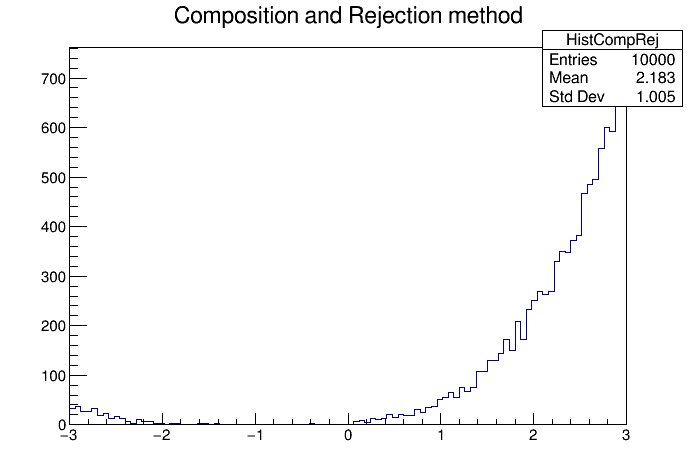

In [59]:
HistCompRej.Draw()
c.Draw()

In [60]:
fitq = HistCompRej.Fit(f1, "S")

 FCN=103.762 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=8.7953e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.79181e+00   2.80640e-02   1.40256e-04  -1.49448e-08


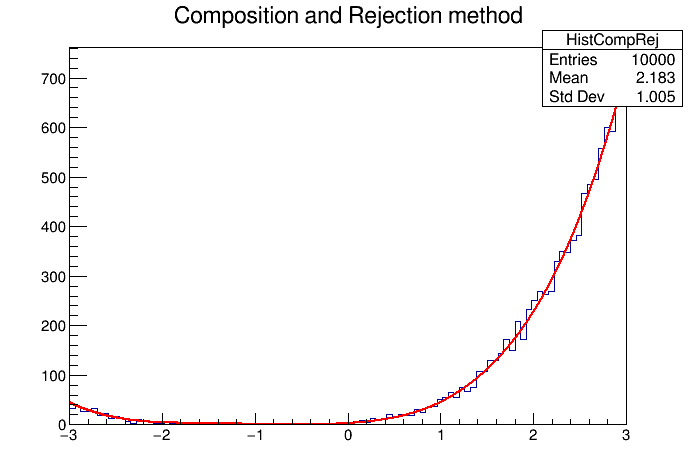

In [61]:
HistCompRej.Draw()
c.Draw()

In [62]:
print('Среднее =', HistCompRej.GetMean())

Среднее = 2.182612051602063


In [63]:
print('Стандартная ошибка =', hNeuman.GetRMS())

Стандартная ошибка = 1.0313046654501994
